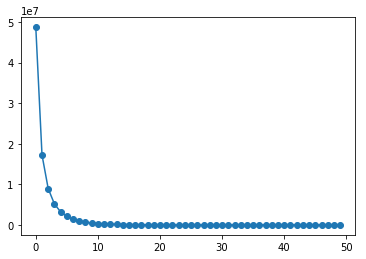

In [5]:
# TensorFlow Ver1:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

N, D, H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.placeholder(tf.float32, shape=(D, H))
w2 = tf.placeholder(tf.float32, shape=(H, D))

h = tf.maximum(tf.matmul(x, w1), 0)
y0 = tf.matmul(h, w2)
diff = y - y0
loss = tf.reduce_mean(tf.reduce_sum(diff**2, axis=1))
grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

loss_val = [0] * 50
with tf.Session() as sess:
    values = {x: np.random.randn(N,D),
              y: np.random.randn(N,D),
              w1: np.random.randn(D,H),
              w2: np.random.randn(H,D)}
    learning_rate = 1e-5
    for i in range(50):
        out = sess.run([loss, grad_w1, grad_w2], feed_dict = values)
        loss_val[i], grad_w1_val, grad_w2_val = out
        values[w1] -= learning_rate * grad_w1_val
        values[w2] -= learning_rate * grad_w2_val

plt.plot(range(50), loss_val, 'o-')
plt.show()

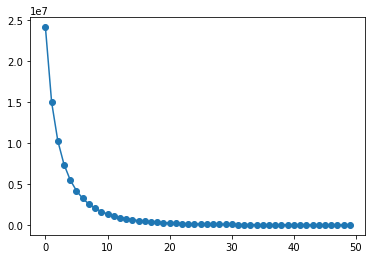

In [32]:
# TensorFlow Ver2:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

N, D, H, It = 64, 1000, 100, 50
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.Variable(tf.random_normal((D, H)))
w2 = tf.Variable(tf.random_normal((H, D)))

h = tf.maximum(tf.matmul(x, w1), 0)
y0 = tf.matmul(h, w2)
loss = tf.nn.l2_loss(y-y0)/N

optimizer = tf.train.GradientDescentOptimizer(1e-5)
updates = optimizer.minimize(loss)

loss_val = [0] * It
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N,D),
              y: np.random.randn(N,D)}
    for i in range(It):
        loss_val[i], _ = sess.run([loss, updates], feed_dict = values)

plt.plot(range(It), loss_val, 'o-')
plt.show()

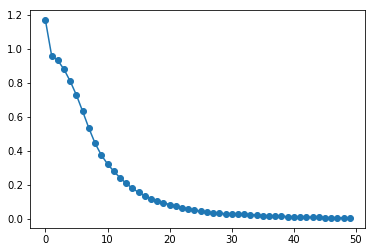

In [4]:
# TensorFlow Ver3:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

N, D, H, It = 64, 1000, 100, 50
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))

init = tf.contrib.layers.xavier_initializer()
h = tf.layers.dense(inputs=x, units=H, activation=tf.nn.relu, kernel_initializer=init)
y0 = tf.layers.dense(inputs=h, units=D, kernel_initializer=init)

loss = tf.losses.mean_squared_error(y0, y)

optimizer = tf.train.AdamOptimizer(1e-2)
updates = optimizer.minimize(loss)

loss_val = [0] * It
summary_op = tf.summary.merge_all()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N,D), y: np.random.randn(N,D)}
    writer = tf.summary.FileWriter('F:\hhh', sess.graph)
    for i in range(It):
        loss_val[i], _ = sess.run([loss, updates], feed_dict = values)
        #op = sess.run(summary_op)
        #writer.add_summary(summary_op, i)

plt.plot(range(It), loss_val, 'o-');
plt.show()

In [8]:
# TensorBoard Ver1:
import tensorflow as tf
a = tf.constant([2, 2], name="a")
b = tf.constant([3, 6], name="b")
x = tf.add(a, b, name="add")
 
with tf.Session() as sess:
       writer = tf.summary.FileWriter('F:/hhh', sess.graph)
print(sess.run(x))
 
# close the writer when you’re done using it
writer.close()

[5 8]


In [1]:
# Keras:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam

N, D, H = 64, 1000, 100

model = Sequential()
model.add(Dense(input_dim=D, units=H))
model.add(Activation('relu'))
model.add(Dense(input_dim=H, units=D))

opt = Adam(lr=1e-2)
model.compile(loss='mean_squared_error', optimizer=opt)

x = np.random.randn(N, D)
y = np.random.randn(N, D)

history = model.fit(x, y, epochs=200, batch_size=N, verbose=0)

print(np.sum((model.predict(x)-y)**2))

Using TensorFlow backend.


89.2386532142


In [2]:
# Theano:
import theano
import theano.tensor as T

# Batch size, input dim, hidden dim, num classes
N, D, H, C = 64, 1000, 100, 10

x = T.matrix('x')
y = T.matrix('y', dtype='int64')
w1 = T.matrix('w1')
w2 = T.matrix('w2')

# Forward pass: Compute scores
a0 = x.dot(w1)
a = T.nnet.relu(a0)
a1 = a.dot(w2)
scores = T.nnet.relu(a1)

# Forward pass: Compute softmax loss
probs = T.nnet.softmax(scores)
loss = T.nnet.categorical_crossentropy(probs,y).mean()

# Backward pass: compute gradients
dw1, dw2 = T.grad(loss, [w1,w2])

# Compile a function to compute loss, etc. Not computing yet.
f = theano.function(inputs=[x,y,w1,w2], outputs=[loss,scores,dw1,dw2])

# Run the function
xx = np.random.randn(N, D)
yy = np.random.randint(C, size=N)
ww1 = 1e-2 * np.random.randn(D, H)
ww2 = 1e-2 * np.random.randn(H, C)

learning_rate = 1e-1
for i in range(50):
    loss, scores, dw1, dw2 = f(xx, yy, ww1, ww2)
    print(loss)
    ww1 -= learning_rate * dw1
    ww2 -= learning_rate * dw2


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce 605 (CNMeM is enabled with initial size: 75.0% of memory, cuDNN not available)


NameError: name 'CVM' is not defined